# Idea_Number_2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log as LN
from time import time as now

In [2]:
def Social_gap():
    eps = 1e-4
    L = np.linspace(eps, 5, 250)
    R = (L + 1) / L
    plt.figure(figsize = (8, 6))
    plt.plot(L, R, linewidth = 2)
    plt.axis([0, 5, 0, 8])
    plt.grid()
    plt.plot([1, 1], [0, 2], 'k--', linewidth = 1.5)
    plt.plot([0, 1], [2, 2], 'k--', linewidth = 1.5)
    plt.plot([0, 5], [1, 1], 'r--', linewidth = 1.5)
    plt.xlabel('L')
    plt.ylabel('R')
    plt.title('Social gap versus minimum normalized power')

In [3]:
def payoff_1(p, q, M, L):
    a11 = (p - L) * LN ((p - L + 1) / (p - L)) - M
    a12 = p * LN((p + 1) / p) - M
    a21 = (p - L) * LN((p + 1) / p) + M
    a22 = p * LN((p + L + 1) / (p + L))
    A = np.array([[a11, a12],
                  [a21, a22]])
    #return A
    return a11, a12, a21, a22

In [4]:
def payoff_2(p, q, M, L):
    b11 = (q - L) * LN ((q - L + 1) / (q - L)) - M
    b12 = (q - L) * LN((q + 1) / q) + M
    b21 = q * LN((q + 1) / q) - M
    b22 = q * LN((q + L + 1) / (q + L))
    B = np.array([[b11, b12],
                  [b21, b22]])
    #return B
    return b11, b12, b21, b22

In [5]:
def Is_Nash(a11, a12, a21, a22, b11, b12, b21, b22):
    AA, AN, NA, NN = False, False, False, False
    if((a11 >= a21) and (b11 >= b12)): AA = True
    if((a12 >= a22) and (b12 >= b11)): AN = True
    if((a21 >= a11) and (b21 >= b22)): NA = True
    if((a22 >= a12) and (b22 >= b21)): NN = True
    return AA, AN, NA, NN

In [6]:
def My_Figure(M, L):
    eps = 1e-7
    power = np.linspace(L + eps, L + 1 - eps, 200)
    n = power.size
    
    p_AA, q_AA = [], []
    p_AN, q_AN = [], []
    p_NA, q_NA = [], []
    p_NN, q_NN = [], []
    p_AN_NA, q_AN_NA = [], []
    
    for i in range(n):
        for j in range(n):
            
            p = power[i]; a11, a12, a21, a22 = payoff_1(p, 0, M, L)
            q = power[j]; b11, b12, b21, b22 = payoff_2(0, q, M, L)
            AA, AN, NA, NN = Is_Nash(a11, a12, a21, a22, b11, b12, b21, b22)
            
            if((AA == True) and (AN == False) and (NA == False) and (NN == False)):
                p_AA.append(p)
                q_AA.append(q)
            if((AA == False) and (AN == True) and (NA == False) and (NN == False)):
                p_AN.append(p)
                q_AN.append(q)
            if((AA == False) and (AN == False) and (NA == True) and (NN == False)):
                p_NA.append(p)
                q_NA.append(q)
            if((AA == False) and (AN == False) and (NA == False) and (NN == True)):
                p_NN.append(p)
                q_NN.append(q)
            if((AA == False) and (AN == True) and (NA == True) and (NN == False)):
                p_AN_NA.append(p)
                q_AN_NA.append(q)
    
    s = 1 / 8
    if(len(p_AA) > 0):
        plt.scatter(p_AA, q_AA, s = s, c = 'red')
    
    if(len(p_AN) > 0):
        plt.scatter(p_AN, q_AN, s = s, c = 'yellow')
        
    if(len(p_NA) > 0):
        plt.scatter(p_NA, q_NA, s = s, c = 'yellow')
        
    if(len(p_NN) > 0):
        plt.scatter(p_NN, q_NN, s = s, c = 'blue')
        
    if(len(p_AN_NA) > 0):
        plt.scatter(p_AN_NA, q_AN_NA, s = s, c = 'magenta')

    x = [L, L + 1, L + 1, L,     L]
    y = [L, L,     L + 1, L + 1, L]
    plt.plot(x, y, 'k--', linewidth = 2)
    plt.axis('square')
    plt.grid()
    plt.axis([-0.5, 2.5, -0.5, 2.5])
    string1 = 'M = ' + str(M) + ' , L = ' + str(L)
    prob_not_attack = len(p_NN) / (n ** 2)
    prob_attack = 1 - prob_not_attack
    prob_attack = np.round(prob_attack * 1000) / 10
    string2 = 'Probability of Attack = ' + str(prob_attack) + ' %' 
    plt.title(string1 + '\n' + string2)

In [7]:
def Probability_of_Attack(M, L):
    eps = 1e-7
    power = np.linspace(L + eps, L + 1 - eps, 50)
    n = power.size
    p_NN, q_NN = [], []
    
    for i in range(n):
        for j in range(n):
            
            p = power[i]; a11, a12, a21, a22 = payoff_1(p, 0, M, L)
            q = power[j]; b11, b12, b21, b22 = payoff_2(0, q, M, L)
            AA, AN, NA, NN = Is_Nash(a11, a12, a21, a22, b11, b12, b21, b22)
            
            if((AA == False) and (AN == False) and (NA == False) and (NN == True)):
                p_NN.append(p)
                q_NN.append(q)
    
    prob_not_attack = len(p_NN) / (n ** 2)
    prob_attack = 1 - prob_not_attack
    return prob_attack

In [8]:
def Reverse_Rows(A):
    B = np.copy(A)
    row = A.shape[0]
    for i in range(row):
        B[i, :] = A[row - 1 - i, :]
    return B

In [9]:
def Calculate_Attack_Matrix():
    MM = np.linspace(0, 1, 201)
    LL = np.linspace(0, 1, 201)
    mm = len(MM)
    ll = len(LL)
    Attack_Matrix = np.zeros((mm, ll))

    for m in range(mm):
        for l in range(ll):
            M = MM[m]
            L = LL[l]
            Attack_Matrix[m, l] = Probability_of_Attack(M, L)

    Attack_Matrix = Reverse_Rows(Attack_Matrix)
    return Attack_Matrix

In [10]:
def Image_Plot(Attack_Matrix):
    plt.figure(figsize = (10, 10))
    plt.imshow(Attack_Matrix)
    plt.colorbar()
    plt.axis('off')
    plt.grid()
    plt.jet()
    
    d = 1.5
    plt.text((  0 - d) * 2, 105 * 2, '0.0')
    plt.text(( 10 - d) * 2, 105 * 2, '0.1')
    plt.text(( 20 - d) * 2, 105 * 2, '0.2')
    plt.text(( 30 - d) * 2, 105 * 2, '0.3')
    plt.text(( 40 - d) * 2, 105 * 2, '0.4')
    plt.text(( 50 - d) * 2, 105 * 2, '0.5')
    plt.text(( 60 - d) * 2, 105 * 2, '0.6')
    plt.text(( 70 - d) * 2, 105 * 2, '0.7')
    plt.text(( 80 - d) * 2, 105 * 2, '0.8')
    plt.text(( 90 - d) * 2, 105 * 2, '0.9')
    plt.text((100 - d) * 2, 105 * 2, '1.0')

    d = -1
    plt.text(-7 * 2, (100 - d) * 2, '0.0')
    plt.text(-7 * 2, ( 90 - d) * 2, '0.1')
    plt.text(-7 * 2, ( 80 - d) * 2, '0.2')
    plt.text(-7 * 2, ( 70 - d) * 2, '0.3')
    plt.text(-7 * 2, ( 60 - d) * 2, '0.4')
    plt.text(-7 * 2, ( 50 - d) * 2, '0.5')
    plt.text(-7 * 2, ( 40 - d) * 2, '0.6')
    plt.text(-7 * 2, ( 30 - d) * 2, '0.7')
    plt.text(-7 * 2, ( 20 - d) * 2, '0.8')
    plt.text(-7 * 2, ( 10 - d) * 2, '0.9')
    plt.text(-7 * 2, (    - d) * 2, '1.0')

    d = 0.5
    plt.plot([(  0 - d) * 2, (100 + d) * 2, (100 + d) * 2, (0 - d) * 2, (  0 - d) * 2], 
             [(100 + d) * 2, (100 + d) * 2, (  0 - d) * 2, (0 - d) * 2, (100 + d) * 2],
             linewidth = 1.5, 
             c = 'k')

    linewidth = 0.6
    c = 'w'
    plt.plot([10 * 2, 10 * 2], [0 * 2, 100 * 2], linewidth = linewidth, c = c)
    plt.plot([20 * 2, 20 * 2], [0 * 2, 100 * 2], linewidth = linewidth, c = c)
    plt.plot([30 * 2, 30 * 2], [0 * 2, 100 * 2], linewidth = linewidth, c = c)
    plt.plot([40 * 2, 40 * 2], [0 * 2, 100 * 2], linewidth = linewidth, c = c)
    plt.plot([50 * 2, 50 * 2], [0 * 2, 100 * 2], linewidth = linewidth, c = c)
    plt.plot([60 * 2, 60 * 2], [0 * 2, 100 * 2], linewidth = linewidth, c = c)
    plt.plot([70 * 2, 70 * 2], [0 * 2, 100 * 2], linewidth = linewidth, c = c)
    plt.plot([80 * 2, 80 * 2], [0 * 2, 100 * 2], linewidth = linewidth, c = c)
    plt.plot([90 * 2, 90 * 2], [0 * 2, 100 * 2], linewidth = linewidth, c = c)


    plt.plot([0 * 2, 100 * 2], [10 * 2, 10 * 2], linewidth = linewidth, c = c)
    plt.plot([0 * 2, 100 * 2], [20 * 2, 20 * 2], linewidth = linewidth, c = c)
    plt.plot([0 * 2, 100 * 2], [30 * 2, 30 * 2], linewidth = linewidth, c = c)
    plt.plot([0 * 2, 100 * 2], [40 * 2, 40 * 2], linewidth = linewidth, c = c)
    plt.plot([0 * 2, 100 * 2], [50 * 2, 50 * 2], linewidth = linewidth, c = c)
    plt.plot([0 * 2, 100 * 2], [60 * 2, 60 * 2], linewidth = linewidth, c = c)
    plt.plot([0 * 2, 100 * 2], [70 * 2, 70 * 2], linewidth = linewidth, c = c)
    plt.plot([0 * 2, 100 * 2], [80 * 2, 80 * 2], linewidth = linewidth, c = c)
    plt.plot([0 * 2, 100 * 2], [90 * 2, 90 * 2], linewidth = linewidth, c = c)

    plt.text(50 * 2, 110 * 2, 'L')
    plt.text(-13 * 2, 51* 2, 'M')
    plt.text(35, -8, 'Probability of attack in terms of M and L', fontsize = 13)

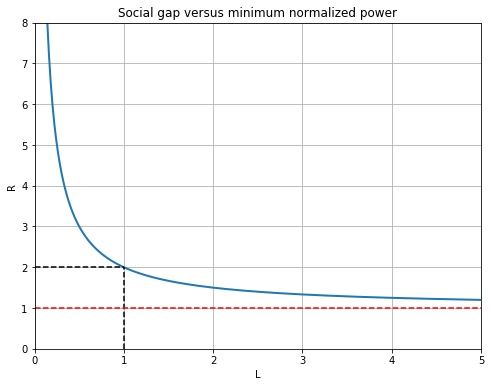

In [11]:
Social_gap()

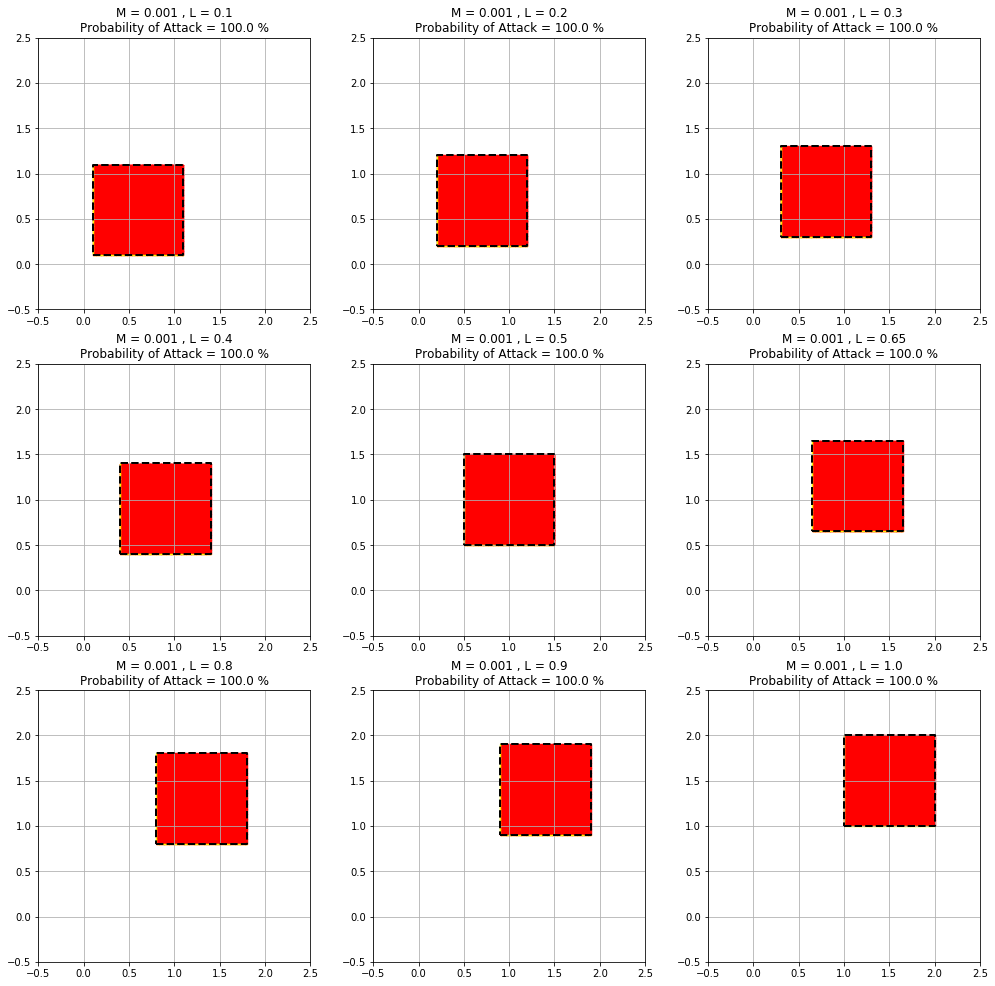

In [12]:
M  = 0.001
LL = [0.1, 0.2, 0.3, 0.4, 0.5, 0.65, 0.80, 0.90, 1.0]
i = 1
plt.figure(figsize = (17, 17))
for L in LL:
    plt.subplot(3, 3, i)
    My_Figure(M, L)
    i += 1

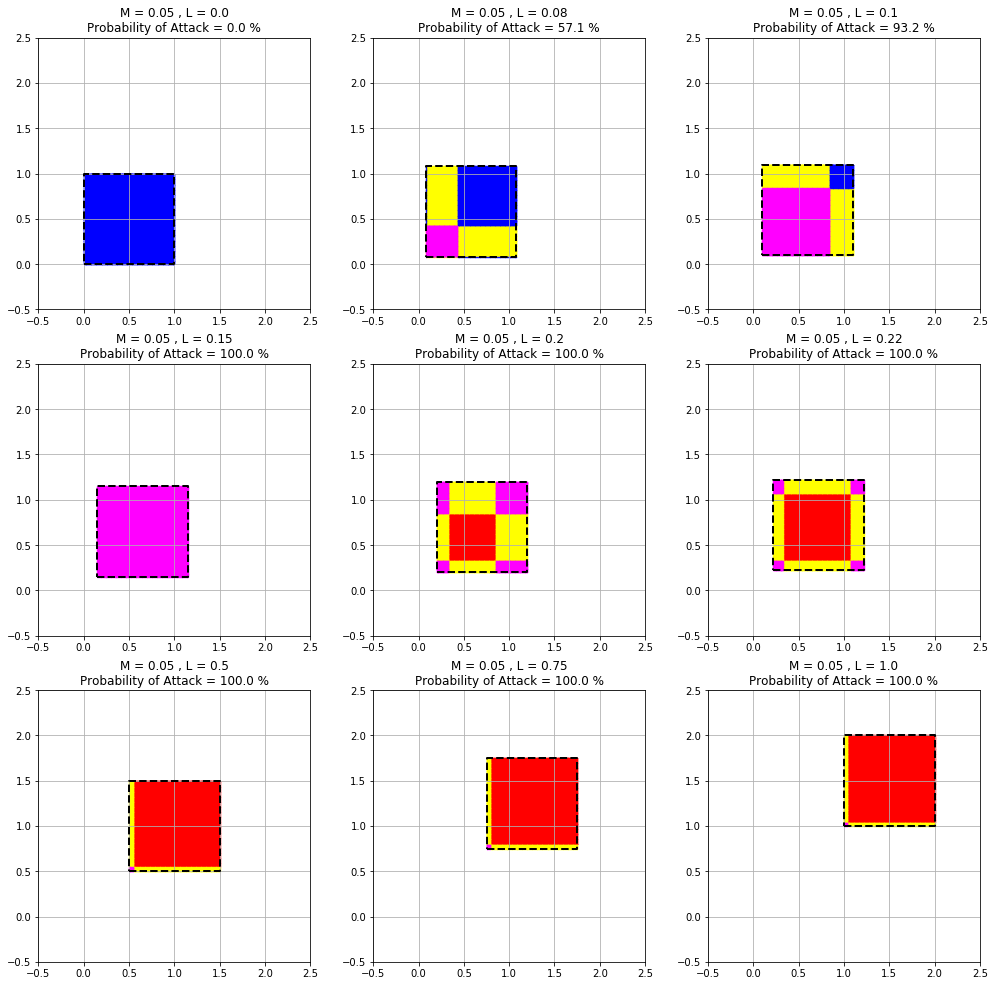

In [13]:
M  = 0.05
LL = [0.0, 0.08, 0.1, 0.15, 0.2, 0.22, 0.5, 0.75, 1.0]
i = 1
plt.figure(figsize = (17, 17))
for L in LL:
    plt.subplot(3, 3, i)
    My_Figure(M, L)
    i += 1

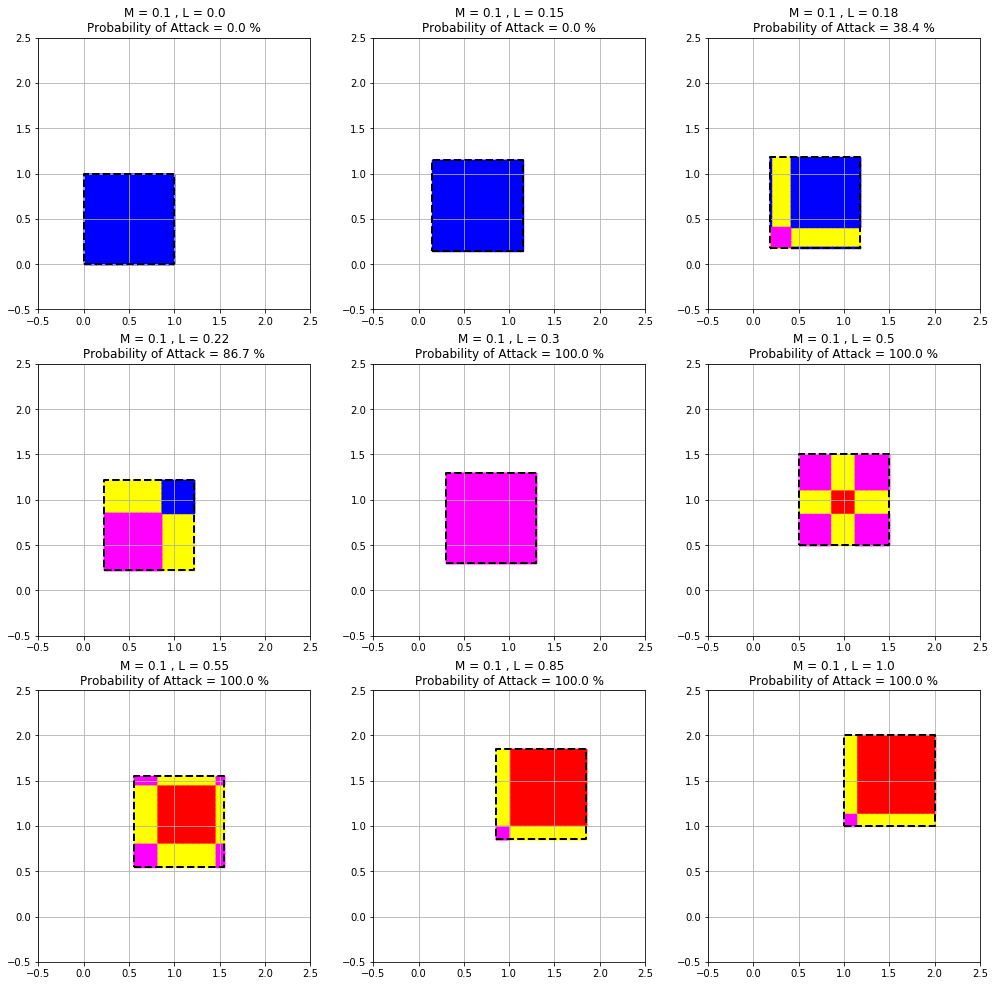

In [14]:
M  = 0.1
LL = [0.0, 0.15, 0.18, 0.22, 0.3, 0.5, 0.55, 0.85, 1.0]
i = 1
plt.figure(figsize = (17, 17))
for L in LL:
    plt.subplot(3, 3, i)
    My_Figure(M, L)
    i += 1

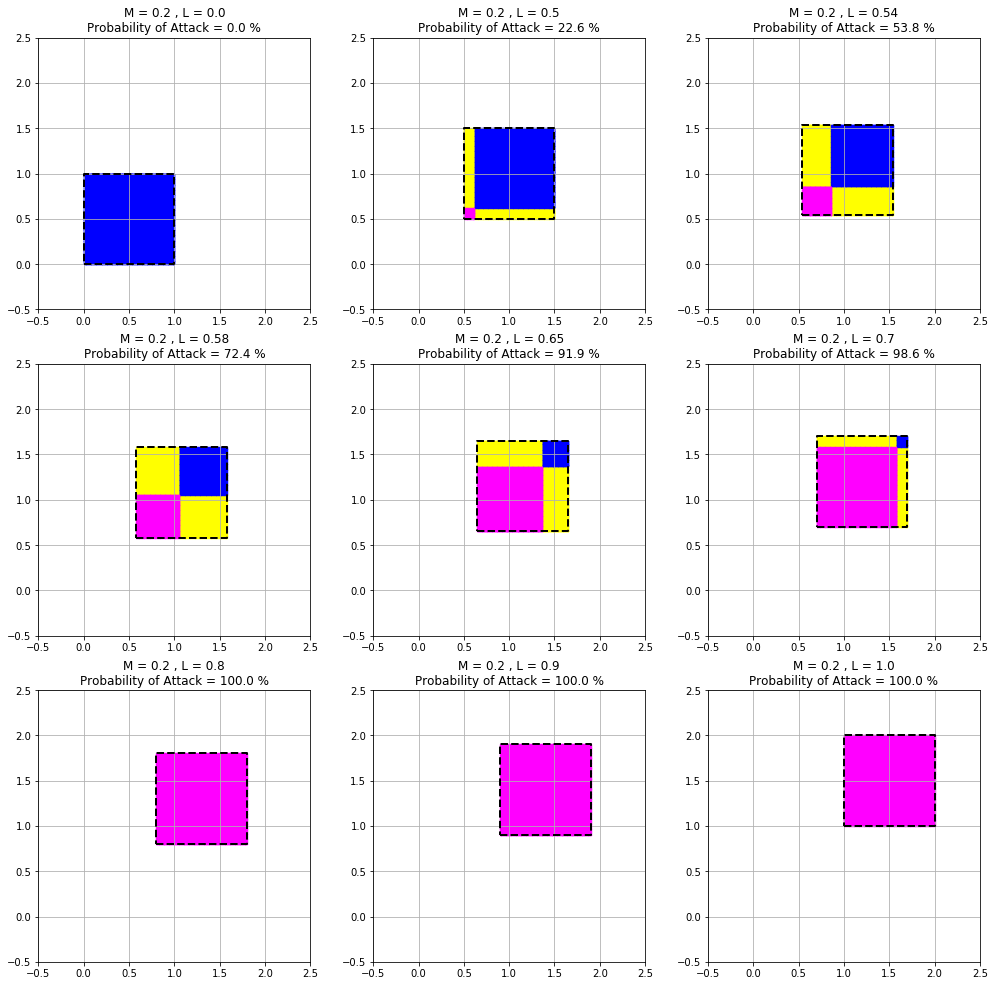

In [15]:
M  = 0.2
LL = [0.0, 0.5, 0.54, 0.58, 0.65, 0.70, 0.80, 0.90, 1.0]
i = 1
plt.figure(figsize = (17, 17))
for L in LL:
    plt.subplot(3, 3, i)
    My_Figure(M, L)
    i += 1

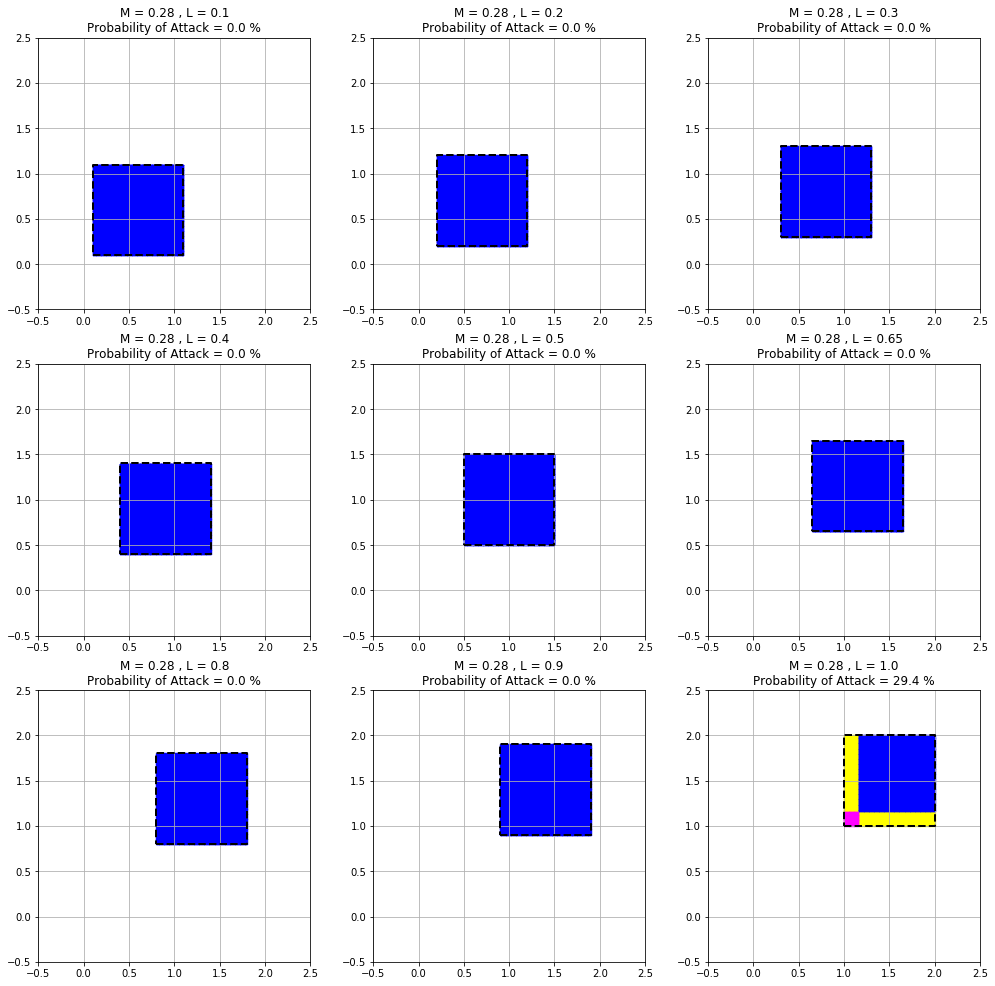

In [16]:
M  = 0.28
LL = [0.1, 0.2, 0.3, 0.4, 0.5, 0.65, 0.80, 0.90, 1.0]
i = 1
plt.figure(figsize = (17, 17))
for L in LL:
    plt.subplot(3, 3, i)
    My_Figure(M, L)
    i += 1

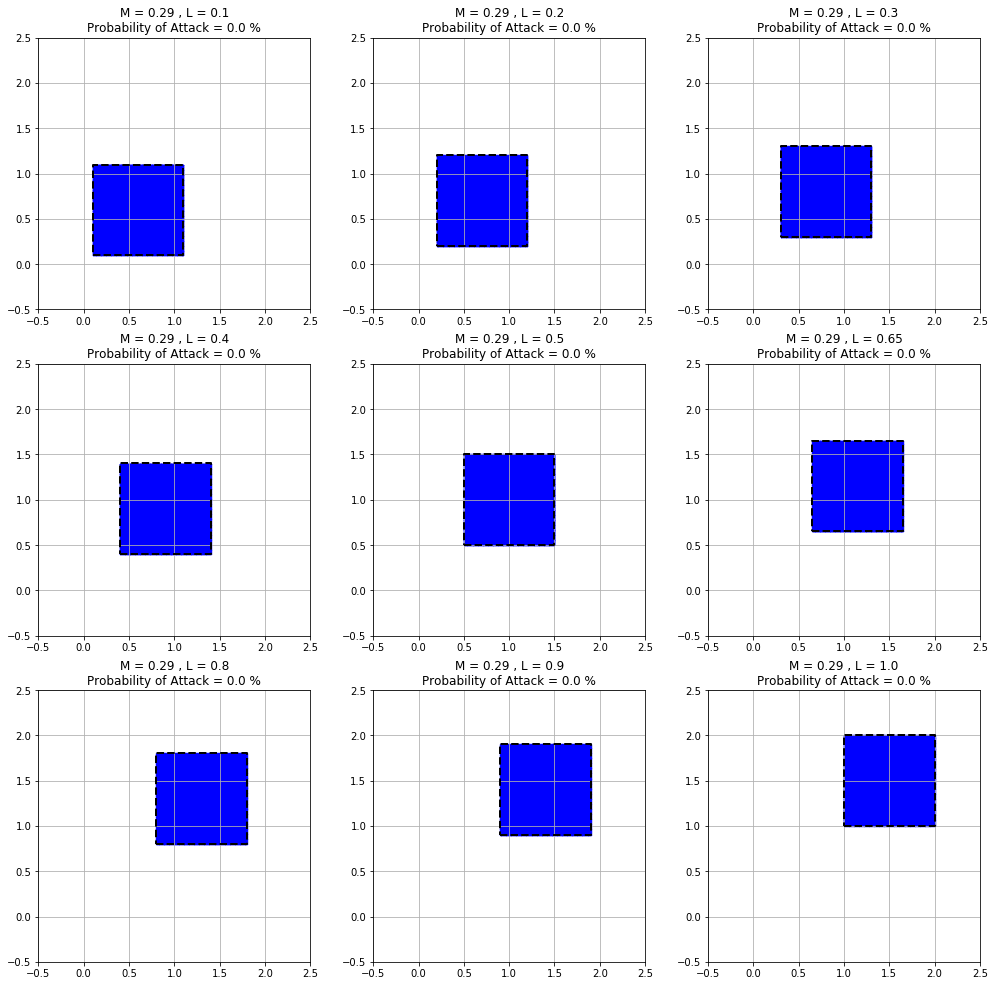

In [17]:
M  = 0.29
LL = [0.1, 0.2, 0.3, 0.4, 0.5, 0.65, 0.80, 0.90, 1.0]
i = 1
plt.figure(figsize = (17, 17))
for L in LL:
    plt.subplot(3, 3, i)
    My_Figure(M, L)
    i += 1

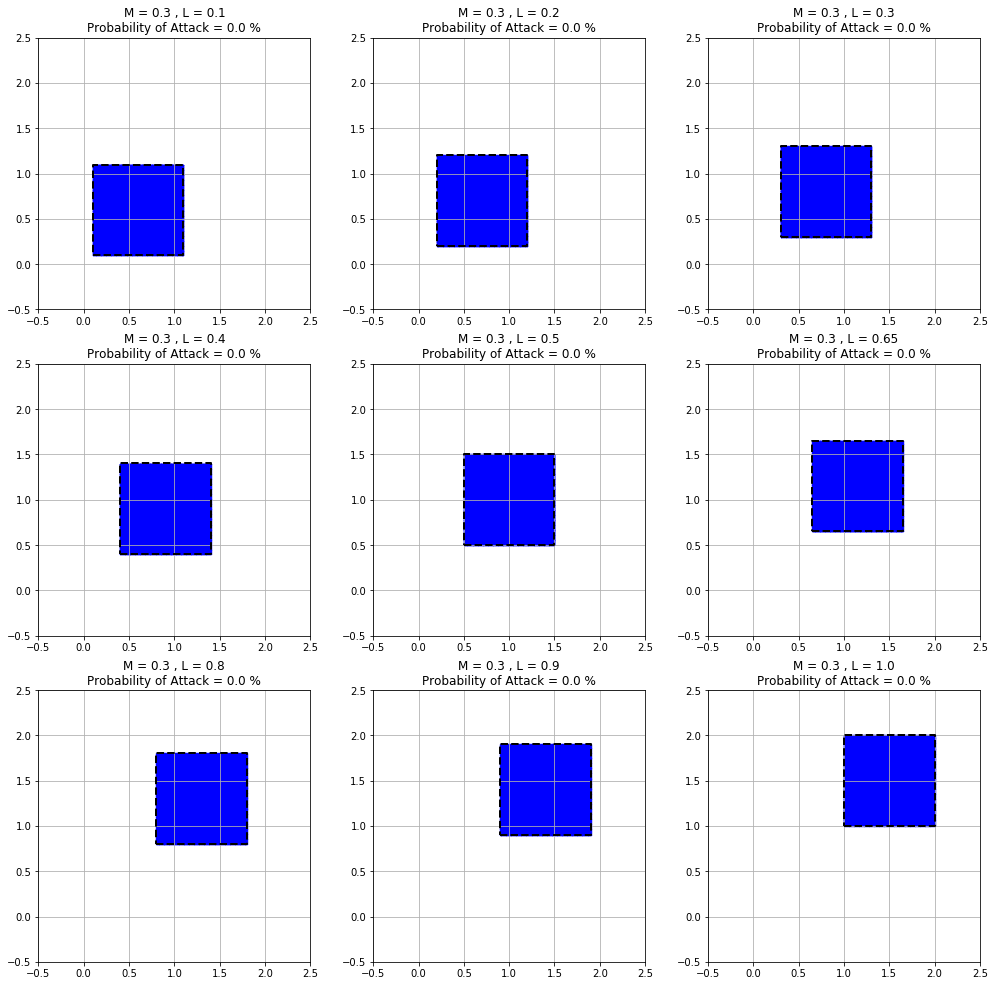

In [18]:
M  = 0.3
LL = [0.1, 0.2, 0.3, 0.4, 0.5, 0.65, 0.80, 0.90, 1.0]
i = 1
plt.figure(figsize = (17, 17))
for L in LL:
    plt.subplot(3, 3, i)
    My_Figure(M, L)
    i += 1

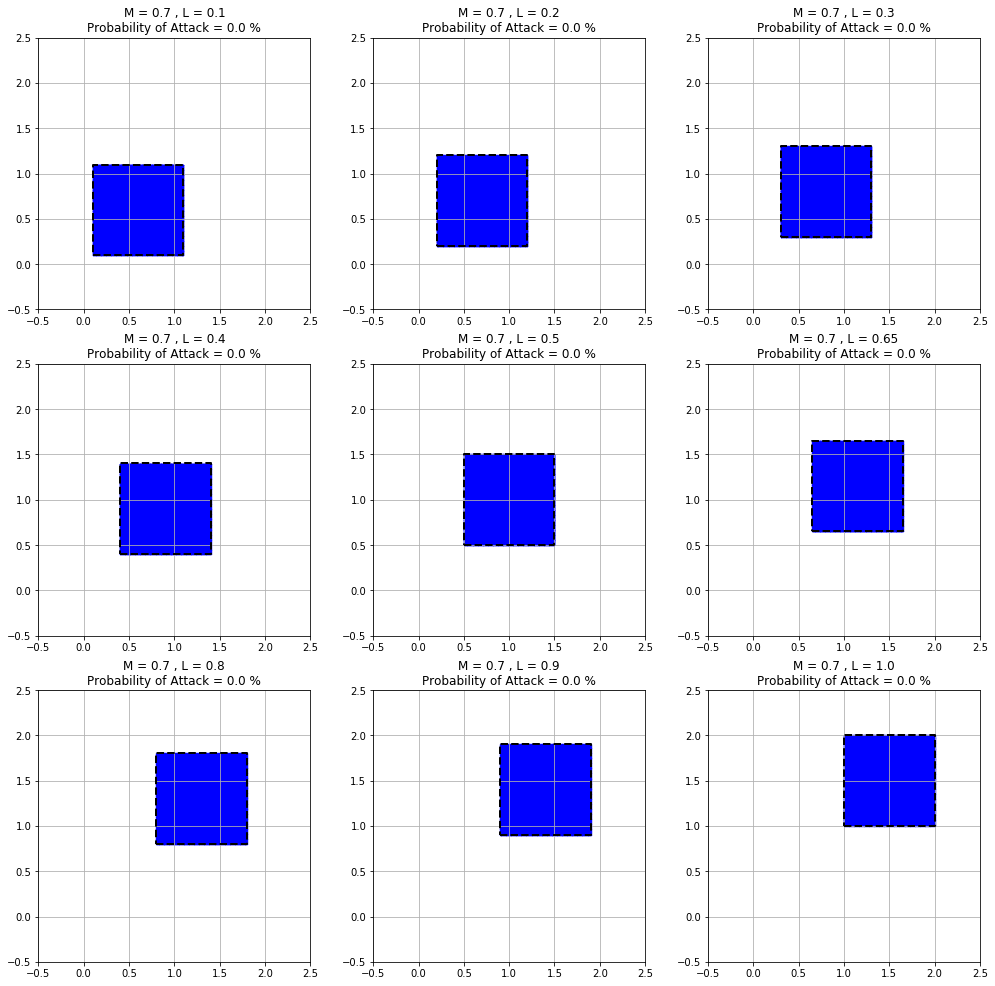

In [19]:
M  = 0.7
LL = [0.1, 0.2, 0.3, 0.4, 0.5, 0.65, 0.80, 0.90, 1.0]
i = 1
plt.figure(figsize = (17, 17))
for L in LL:
    plt.subplot(3, 3, i)
    My_Figure(M, L)
    i += 1

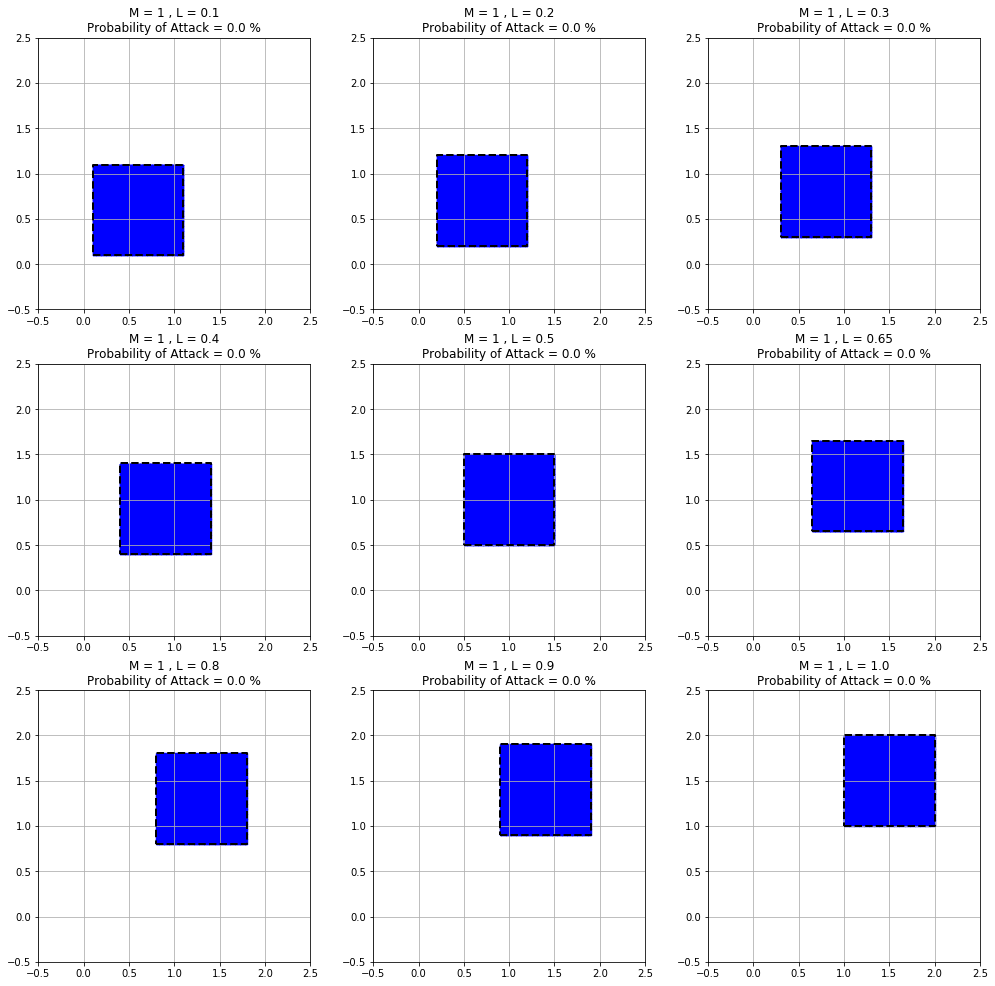

In [20]:
M  = 1
LL = [0.1, 0.2, 0.3, 0.4, 0.5, 0.65, 0.80, 0.90, 1.0]
i = 1
plt.figure(figsize = (17, 17))
for L in LL:
    plt.subplot(3, 3, i)
    My_Figure(M, L)
    i += 1

Total time = 3212 seconds


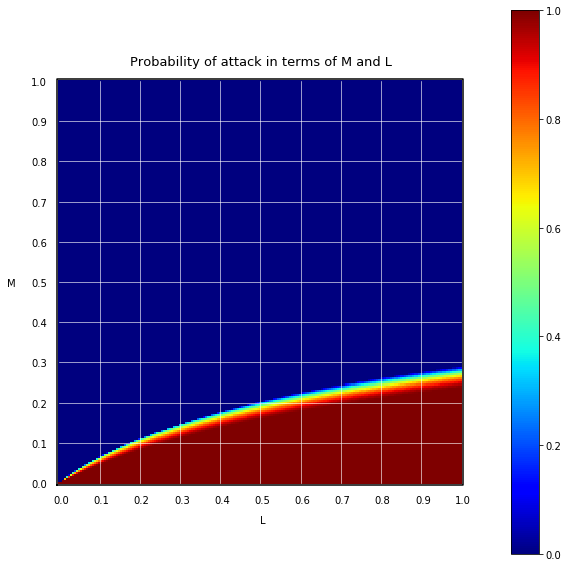

In [21]:
t1 = now()
Attack_Matrix = Calculate_Attack_Matrix()
Image_Plot(Attack_Matrix)
t2 = now()
print('Total time =', np.int(t2 - t1), 'seconds')